In [54]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA

In [28]:
#Loading the dataset
df=pd.read_csv("space.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512


In [29]:
#getting all column names and checking null values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

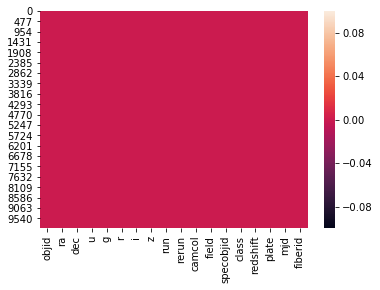

In [30]:
#Using Heatmap
sns.heatmap(df.isnull())
plt.show()

Observation: 
    No null values are found

In [31]:
#Check the datatypes of each column in dataset
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [32]:
#Understanding the data /Finding unique values

for i in df.columns:
    print("No of unique values in ",i," is ",len(df[i].unique()))
    if len(df[i].unique()) < 5:
          print("Unique values are : ",df[i].unique(),"\n")

No of unique values in  objid  is  1
Unique values are :  [1.24e+18] 

No of unique values in  ra  is  10000
No of unique values in  dec  is  10000
No of unique values in  u  is  9730
No of unique values in  g  is  9817
No of unique values in  r  is  9852
No of unique values in  i  is  9890
No of unique values in  z  is  9896
No of unique values in  run  is  23
No of unique values in  rerun  is  1
Unique values are :  [301] 

No of unique values in  camcol  is  6
No of unique values in  field  is  703
No of unique values in  specobjid  is  335
No of unique values in  class  is  3
Unique values are :  ['STAR' 'GALAXY' 'QSO'] 

No of unique values in  redshift  is  9637
No of unique values in  plate  is  487
No of unique values in  mjd  is  355
No of unique values in  fiberid  is  892


#### Observation:
We now know that

a) ObjectId and Rerun has only 1 value and can be dropped. 

b) Class-target variable has three values - STAR , GALAXY, QSO

In [33]:
# As objectid, spaceobjid are only id numbers they can be dropped
#Additionally as run,rerun,camcol are indicating camera position and not information about the celestial bodies, they can also be dropped. 

df.drop(["objid",'specobjid','run','rerun','camcol','field'],inplace=True,axis=1)
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


## DATA VISUALIZATION - Univariate Analysis

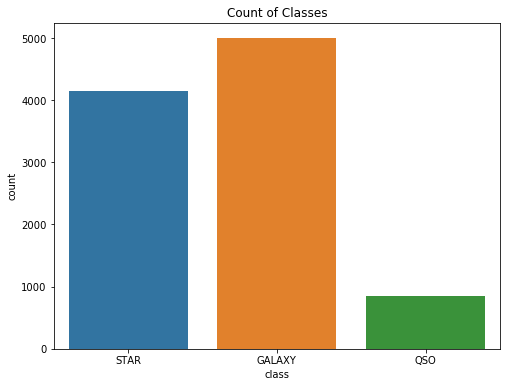

In [34]:
#First we will plot count of classes to understand the distribution of the data.
plt.figure(figsize=[8,6])
sns.countplot(x ="class" ,data = df)
plt.title("Count of Classes")
plt.show()

#### Observation: 
a. Clearly Stars and Galaxy dominate the dataset and QSO have the lesser amount of data in the dataset. 

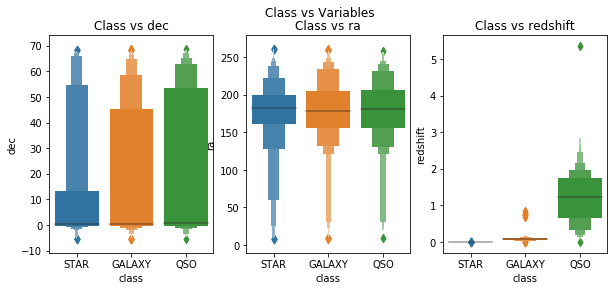

In [35]:
#Plotting various classes with other variables to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
fig.suptitle('Class vs Variables')
col = ["dec","ra","redshift"]
for i in range(0,len(col)):
    axes[i] = sns.boxenplot(x="class",y=col[i],data=df, ax=axes[i])
    axes[i].set_title("Class vs "+col[i])

#### Observation: 
##### Dec: 
a. Dec position indicates max stars are found from dec value 0 to 10 , galaxy from 0 to 40 , QSO from 0 to 60.  
 b. Dec position should be directly correlated to the probability of differentiating the classes

##### RA:

a. RA values for all classes are within the same range and not much difference is seen.

##### Redshift: 
a. Reshift increases as the distance/size of celestial bodies increase  
b. Star has minimum reshift , QSO has maximum reshift.  
c. This is a directly correlated variable to identify classes.  
    

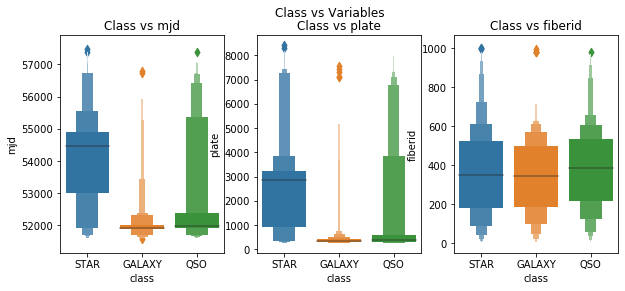

In [36]:
#Plotting various classes with other variables to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(10,4))
fig.suptitle('Class vs Variables')
col = ["mjd","plate","fiberid"]
for i in range(0,len(col)):
    axes[i] = sns.boxenplot(x="class",y=col[i],data=df, ax=axes[i])
    axes[i].set_title("Class vs "+col[i])

#### Observation: 
##### Modified Julian Date: 
a.MJD values for STAR and QSO varies from 52000 to 56000 , whereas GALAXY band is narrower  
b.This indicates that no. of galaxies discovered has decreased significantly

##### Plate:

a. Similar values are seen for Plate data as mjd data. 

##### Fiberid: 
a. No significant change in fiberid is observed   
b. This column shows equal distribution.  
    

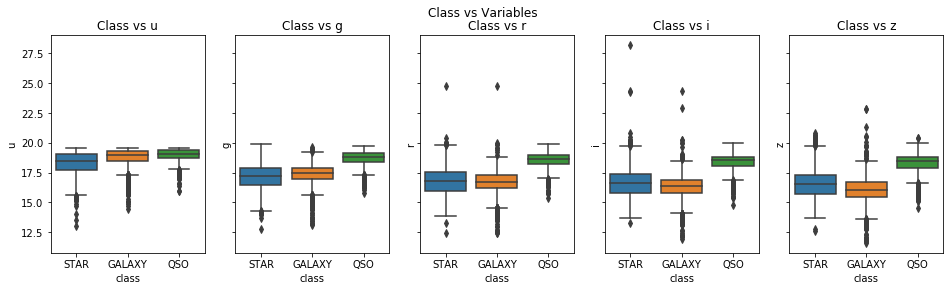

In [37]:
#Plotting various classes with other variables to understand the relationship
fig,axes = plt.subplots(nrows=1,ncols=5,figsize=(16,4),sharey=True)
fig.suptitle('Class vs Variables')
col = ["u",'g','r','i',"z"]
for i in range(0,len(col)):
    axes[i] = sns.boxplot(x="class",y=col[i],data=df, ax=axes[i])
    axes[i].set_title("Class vs "+col[i])

#### Observation: 

a. All graphs look similar, apart from few outliers in r, i and z.

b. However correlation is differnet for u attribute that shows differnet relationship than other variables. 

c. The correlation seem similar for all classes in each bands. 

# Checking Correlation

In [38]:
#we will tranform categorical data to float using label encoding for better analysis
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"].astype(str))

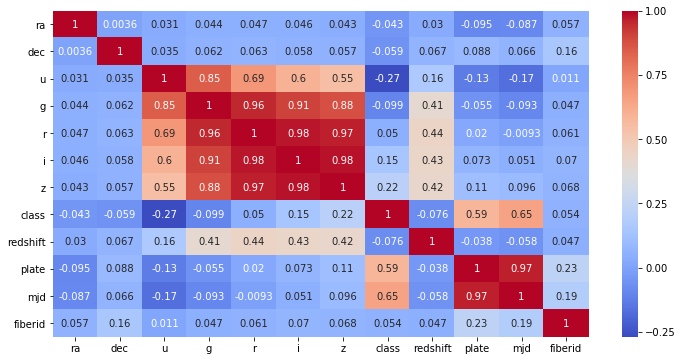

In [39]:
#checking correlation in variables
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
#No significant correlation is observed between average price and other variables.
#However good correlation is shown between other variables

##### Observation: 

a. u,g,r,i,z seems heavily correlated with each other.  
b. Class variable shows positive correlation with mjd,plate,r,i and z and negative correlation with redshift  and dec.  
c. Fiberid and ra shows minimum correlation with class variable.   

# Removing Outliers 

In [40]:
#Lets use the describe function 
df.describe()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,2.000000,5.353854,8410.000000,57481.000000,1000.000000


##### Observations:
a. As mean and median score is varying for many columns , clearly some outliers are present in few columns.

In [41]:
#converting all columns to float for easy analysis. 
for col in df.columns:
    df[col] = df[col].astype(float)
    
print(df.dtypes)
df.head()

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
class       float64
redshift    float64
plate       float64
mjd         float64
fiberid     float64
dtype: object


,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2.0,-0.000009,3306.0,54922.0,491.0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2.0,-0.000055,323.0,51615.0,541.0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.0,0.123111,287.0,52023.0,513.0
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2.0,-0.000111,3306.0,54922.0,510.0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2.0,0.000590,3306.0,54922.0,512.0


In [42]:
#as there are lot of outliers in the data we will use z score analysis
#calculate the zscore
z = np.abs(zscore(df))

In [43]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 9999, 9999, 9999]), array([ 0,  1,  2, ...,  9, 10, 11]))
(10000, 12)


In [44]:
#Assign the value to df_new which are less the threshold value and removing the outliers
filtered_entries= (z < 3).all(axis=1)
df_new = df[filtered_entries]

In [45]:
print(df.shape)
print(df_new.shape)
df_new.head()

(10000, 12)
(8698, 12)


,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2.0,-0.000009,3306.0,54922.0,491.0
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2.0,-0.000055,323.0,51615.0,541.0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.0,0.123111,287.0,52023.0,513.0
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2.0,-0.000111,3306.0,54922.0,510.0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2.0,0.000590,3306.0,54922.0,512.0


##### Observation : 
a. New dataset contains 8698 rows.  
b. Outlier values from 1302 rows are removed. 

In [46]:
#Reassigning table name df to the dataset
df=df_new

# Classifier Modelling

In [47]:
# Dropping region and Day from x for classifcation dataset
#Assigning the value of x for testing and training
xc=df.drop(columns=['class'])
yc=df[["class"]]

In [48]:
#Standardizing value of x by using standardscalar to make the data normally distributed
sc = StandardScaler()
a=sc.fit_transform(xc)
df_xc = pd.DataFrame(a,columns=xc.columns)
df_xc.head()

,ra,dec,u,g,r,i,z,redshift,plate,mjd,fiberid
0,0.022563,-0.563207,1.076410,-0.332856,-0.855097,-0.969819,-1.007660,-0.458367,1.637571,1.667376,0.754994
1,0.024421,-0.561415,0.039766,-0.134171,-0.098144,-0.009474,0.055512,-0.458639,-0.659347,-0.883708,1.016814
2,0.026689,-0.561772,0.960026,0.994046,0.729930,0.573183,0.429065,0.270060,-0.687067,-0.568969,0.870195
3,0.031964,-0.564770,-1.107002,-0.840484,-0.632831,-0.503275,-0.388577,-0.458969,1.637571,1.667376,0.854486
4,0.032318,-0.562701,-1.381874,-1.232219,-0.344809,0.054530,0.257682,-0.454822,1.637571,1.667376,0.864958


In [49]:
#defining a function to find accuracy score, crossvalidation score for the given dataset
def max_acc_score(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    for r_state in range(42,100):
        train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = r_state,test_size = 0.2,stratify = yc)
        model_c.fit(train_xc,train_yc)
        accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
        if accuracy_scr> accuracy_scr_max:
            accuracy_scr_max=accuracy_scr
            final_state = r_state
            final_model = model_c
            mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
            std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
            cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print('\033[1m',"Results for model : ",names,'\n','\033[0m'
          "max accuracy score correspond to random state " ,final_state , "is" , accuracy_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print("*"*100)

In [55]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 
accuracy_scr_max = []
accuracy=[]
std_dev=[]
mean_acc=[]
cross_val=[]
models=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))

for names,model_c in models:
    max_acc_score(names,model_c,df_xc,yc)
   

 Results for model :  Logistic Regression 
 max accuracy score correspond to random state  64 is 0.9747126436781609 
 Mean accuracy score is :  0.9679227615051156 
 Std deviation score is :  0.006338780762458117 
 Cross validation scores are :   [0.97415279 0.96898334 0.96377228 0.95802185 0.97468354]
****************************************************************************************************
 Results for model :  Random Forest 
 max accuracy score correspond to random state  60 is 0.993103448275862 
 Mean accuracy score is :  0.9881576764609553 
 Std deviation score is :  0.002056354658291733 
 Cross validation scores are :   [0.98621482 0.9902355  0.99252444 0.98274871 0.98791715]
****************************************************************************************************
 Results for model :  SVM 
 max accuracy score correspond to random state  66 is 0.9816091954022989 
 Mean accuracy score is :  0.9726380494397706 
 Std deviation score is :  0.0037145916500167814 
 

##### Observations: 
a. From initial model accuracy values we see that RandomForest and DecisionTree are performing better than others.  
b. They have maximum accuracy score and minimum standard deviations.   
c. KNN is the worst performer with 93% accuracy.

In [56]:
#We will check for RFC and DTC individually
#Estimating parameters of DecisionTree Classifiers for best fit
dtr_cl = DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
clf = GridSearchCV(dtr_cl, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [57]:
dtr_clf = DecisionTreeClassifier(criterion="entropy",max_depth=4)
max_acc_score("DecisionTree_Classifier",dtr_clf,df_xc,yc)

 Results for model :  DecisionTree_Classifier 
 max accuracy score correspond to random state  52 is 0.993103448275862 
 Mean accuracy score is :  0.9894229700900397 
 Std deviation score is :  0.0017664987773924428 
 Cross validation scores are :   [0.99080988 0.98851235 0.99022427 0.98619896 0.99079402]
****************************************************************************************************


In [58]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[10,100,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="accuracy")
clf.fit(df_xc,yc)
clf.best_params_

{'n_estimators': 100}

In [59]:
#Again running RFC with n_estimator = 100
rf_clf=RandomForestClassifier(n_estimators=100)
max_acc_score("Random Forest Classifier",rf_clf,df_xc,yc)

 Results for model :  Random Forest Classifier 
 max accuracy score correspond to random state  71 is 0.9936781609195402 
 Mean accuracy score is :  0.9882730154953601 
 Std deviation score is :  0.0029908726087852777 
 Cross validation scores are :   [0.98851235 0.99080988 0.9919494  0.98332375 0.98849252]
****************************************************************************************************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

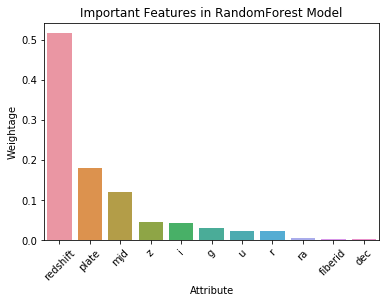

In [103]:
#plotting feature distribution with Random forest model
df_imp_rf= pd.DataFrame({'Attribute': df_xc.columns,'Weightage': rf_clf.feature_importances_})
df_imp_rf = df_imp_rf.sort_values(by='Weightage', ascending=False)

sns.barplot(x="Attribute",y="Weightage",data=df_imp_rf)
plt.title("Important Features in RandomForest Model")
plt.xticks(rotation=45)

#### Observations: 

a. Comparing both the models , clearly Random Forest is giving higher accuracy ~ 99.4% . Hence , we will choose RFC for our model.   
b. During features distribution , Random Forest model is giving maximum importance to Redshift parameter and least importance to dec.

### Confusion Matrix, Presicison and Recall

In [105]:
#Clearly Random Forest Classifier is performing best as accuracy score is closest to 1 so we will use RFC
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,test_size=0.20,stratify=yc)
rf_clf.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(xc_test)

Text(0.5, 1, 'Normalized Confusion Matrix')

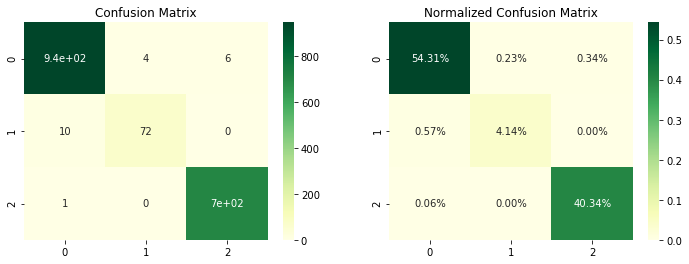

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

cnf = confusion_matrix(yc_test,yc_pred)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=[12,4])
axes[0]= sns.heatmap(cnf,cmap="YlGn",annot=True,ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[1]= sns.heatmap(cnf/np.sum(cnf),cmap="YlGn",annot=True, fmt='.2%',ax=axes[1])
axes[1].set_title("Normalized Confusion Matrix")

##### Observation: 
Confusion matrix shows high accuracy in predicting true values .
>a.54% values are identified as true positives for STAR , 0.23% STAR incorrectly identified as QSO and 0.34% incorrectly identified as Galaxy  
>b. 0.57% QSO values incorrectly identified as STAR, 4.14% QSO correctly identifed  
>c. 0.06% Galaxy incorrectly identified as STAR , 40.34% GALAXY correctly identified.  

Only 21 values were identified incorrectly , rest values are correctly classified

In [136]:
#Precision and Recall
print("Average accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))


Average accuracy score is :  0.9879310344827587
classification report 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       955
         1.0       0.95      0.88      0.91        82
         2.0       0.99      1.00      1.00       703

    accuracy                           0.99      1740
   macro avg       0.98      0.96      0.97      1740
weighted avg       0.99      0.99      0.99      1740



##### Observation:

a. Found high values ( ~0.99) for accuracy , precision and recall for the model . This indicates that model is a good fit for the prediciton. 

## AOC/ROC Analysis

In [140]:
#Finding True positves and false positives in the model 
pred_pb=rf_clf.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)

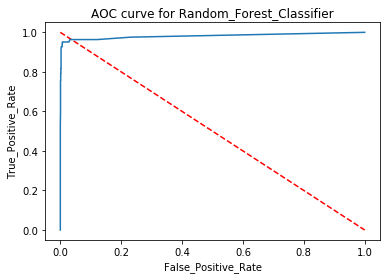

In [139]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'r--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("AOC curve for Random_Forest_Classifier")
plt.show()

### Observations for the Model: 
a. Taken output variable as Class(transformed into numerical value by Label encoder)  
b. Found best model as RandomForestClassifier and best random state is 71 which provides max accuracy of 99.36%.  
c. Fine tuning done on the model and found best estimators for the prediction  
d. Plotted important features and found Redshift is the most important factor contributing to ~50% of the weightage.  
e. Found high precision and recall score of 0.99.  
f. Confusion matrix shows only 21 values out of 8398 were incorrectly classified.  
g. Plotted AOC/ROC line that shows close match between test and predicted values.  
h. Overall model fit is good.  
